In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
train_df =pd.read_csv(r'C:\Users\user\Desktop\kaggle data new\train.csv')
train_df.head()

,id,f0,f1,f2,f3,f4,f5,f6,f7,f8,...,f91,f92,f93,f94,f95,f96,f97,f98,f99,loss
0,0,-0.002350,59,0.766739,-1.350460,42.2727,16.68570,30.3599,1.267300,0.392007,...,-42.43990,26.854000,1.45751,0.696161,0.941764,1.828470,0.924090,2.29658,10.48980,15
1,1,0.784462,145,-0.463845,-0.530421,27324.9000,3.47545,160.4980,0.828007,3.735860,...,-184.13200,7.901370,1.70644,-0.494699,-2.058300,0.819184,0.439152,2.36470,1.14383,3
2,2,0.317816,19,-0.432571,-0.382644,1383.2600,19.71290,31.1026,-0.515354,34.430800,...,7.43721,37.218100,3.25339,0.337934,0.615037,2.216760,0.745268,1.69679,12.30550,6
3,3,0.210753,17,-0.616454,0.946362,-119.2530,4.08235,185.2570,1.383310,-47.521400,...,9.66778,0.626942,1.49425,0.517513,-10.222100,2.627310,0.617270,1.45645,10.02880,2
4,4,0.439671,20,0.968126,-0.092546,74.3020,12.30650,72.1860,-0.233964,24.399100,...,290.65700,15.604300,1.73557,-0.476668,1.390190,2.195740,0.826987,1.78485,7.07197,1


In [3]:
test_df =pd.read_csv(r'C:\Users\user\Desktop\kaggle data new\test.csv')
test_df.head()

,id,f0,f1,f2,f3,f4,f5,f6,f7,f8,...,f90,f91,f92,f93,f94,f95,f96,f97,f98,f99
0,250000,0.812665,15,-1.239120,-0.893251,295.5770,15.87120,23.04360,0.942256,29.898000,...,0.446389,-422.332,-1.44630,1.69075,1.059300,-3.010570,1.94664,0.529470,1.386950,8.78767
1,250001,0.190344,131,-0.501361,0.801921,64.8866,3.09703,344.80500,0.807194,38.421900,...,0.377179,10352.200,21.06270,1.84351,0.251895,4.440570,1.90309,0.248534,0.863881,11.79390
2,250002,0.919671,19,-0.057382,0.901419,11961.2000,16.39650,273.24000,-0.003300,37.940000,...,0.990140,3224.020,-2.25287,1.55100,-0.559157,17.838600,1.83385,0.931796,2.336870,9.05400
3,250003,0.860985,19,-0.549509,0.471799,7501.6000,2.80698,71.08170,0.792136,0.395235,...,1.396880,9689.760,14.77150,1.41390,0.329272,0.802437,2.23251,0.893348,1.359470,4.84833
4,250004,0.313229,89,0.588509,0.167705,2931.2600,4.34986,1.57187,1.118300,7.754630,...,0.862502,2693.350,44.18050,1.58020,-0.191021,26.253000,2.68238,0.361923,1.532800,3.70660


In [35]:
df_subm= pd.read_csv(r"C:\Users\user\Desktop\kaggle data new\sample_submission.csv")
df_subm.head()

,id,loss
0,250000,0
1,250001,0
2,250002,0
3,250003,0
4,250004,0


In [4]:
train_df.shape

(250000, 102)

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Columns: 102 entries, id to loss
dtypes: float64(95), int64(7)
memory usage: 194.5 MB


In [6]:
train_df.corr()

,id,f0,f1,f2,f3,f4,f5,f6,f7,f8,...,f91,f92,f93,f94,f95,f96,f97,f98,f99,loss
id,1.000000,0.000625,0.000333,0.000876,-0.000328,0.001605,-0.001489,-0.002093,0.001868,-0.006448,...,0.000919,-0.000568,0.003579,0.000276,0.000059,0.001217,0.007288,0.003547,0.001189,0.001020
f0,0.000625,1.000000,-0.004339,-0.004808,0.004662,0.001170,0.012141,0.002686,-0.003814,-0.000343,...,0.001487,-0.010135,0.006754,0.000346,0.002566,-0.003691,0.000916,-0.005810,0.010797,0.008921
f1,0.000333,-0.004339,1.000000,-0.005421,0.000400,-0.002447,0.012614,-0.001040,-0.004030,-0.014389,...,-0.004757,-0.005882,0.000846,0.018600,0.003927,-0.010261,0.001508,-0.009793,-0.002633,0.011847
f2,0.000876,-0.004808,-0.005421,1.000000,-0.007057,-0.004661,-0.015663,-0.002435,-0.008019,-0.001225,...,-0.001910,0.028413,-0.001768,-0.007150,-0.010727,0.006028,-0.007387,0.007708,0.001167,-0.005064
f3,-0.000328,0.004662,0.000400,-0.007057,1.000000,-0.003316,0.003605,0.001931,-0.003344,0.006952,...,-0.001747,-0.002413,-0.003863,0.007330,0.000234,-0.001366,-0.000912,0.001084,0.001137,-0.018853
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
f96,0.001217,-0.003691,-0.010261,0.006028,-0.001366,-0.003439,0.000586,-0.006583,-0.003924,0.003426,...,-0.006034,-0.009362,0.002483,-0.013192,0.000263,1.000000,-0.011481,0.005689,-0.001055,-0.020655
f97,0.007288,0.000916,0.001508,-0.007387,-0.000912,-0.000765,-0.010183,0.003493,0.010062,-0.003464,...,0.001235,0.000920,-0.008840,-0.003581,-0.004906,-0.011481,1.000000,0.003898,0.003154,0.003908
f98,0.003547,-0.005810,-0.009793,0.007708,0.001084,0.007636,-0.008550,0.003247,0.014759,-0.003924,...,-0.000962,0.000504,-0.011786,-0.011039,-0.000142,0.005689,0.003898,1.000000,0.002516,0.005806
f99,0.001189,0.010797,-0.002633,0.001167,0.001137,-0.003666,0.009163,-0.002580,0.000896,-0.002488,...,-0.004707,-0.011619,-0.007215,0.007500,-0.002173,-0.001055,0.003154,0.002516,1.000000,0.007507


In [7]:
train_df.describe()

,id,f0,f1,f2,f3,f4,f5,f6,f7,f8,...,f91,f92,f93,f94,f95,f96,f97,f98,f99,loss
count,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,...,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000
mean,124999.500000,0.511213,51.378476,0.107155,0.050010,3595.133426,8.205953,164.508753,0.375533,16.669745,...,4856.812768,22.579100,2.030554,0.079692,1.555097,2.417556,0.537484,1.576900,8.048805,6.813920
std,72168.927986,0.307884,42.396636,1.322200,0.792368,6072.401061,5.475723,183.335563,0.813597,99.758709,...,8501.609009,14.849390,0.900211,0.587780,9.253785,0.892563,0.226589,0.646306,5.647368,7.940179
min,0.000000,-0.069273,-17.000000,-7.895580,-1.475560,-7589.280000,-3.291050,-40.967200,-4.143080,-502.813000,...,-12695.700000,-4.059170,0.057800,-1.998800,-24.686300,-1.131980,0.005249,-0.646967,-0.842397,0.000000
25%,62499.750000,0.251287,18.000000,-0.611172,-0.719418,163.864750,4.110127,27.894900,-0.026245,-17.392025,...,73.203100,11.525450,1.471650,-0.408975,-4.004925,1.906718,0.359646,1.215810,3.732800,1.000000
50%,124999.500000,0.514962,41.000000,0.253815,0.004099,943.000500,7.472445,91.005250,0.619862,8.714945,...,1060.025000,19.993200,1.660830,0.215710,0.759942,2.340430,0.531348,1.451285,7.182205,4.000000
75%,187499.250000,0.777323,75.000000,0.759249,0.765456,4115.355000,11.030950,240.843750,0.933855,55.407625,...,5572.982500,32.271625,2.320085,0.503134,6.202502,2.910020,0.709807,1.901632,10.998550,10.000000
max,249999.000000,1.072070,273.000000,9.768590,1.680190,37847.500000,35.078000,947.143000,4.010380,465.956000,...,54334.600000,79.912400,5.403020,1.944190,42.890400,5.576040,1.105400,4.492620,34.019200,42.000000


# checking the Nana values and missing values

In [8]:
train_df.isnull().sum()

id      0
f0      0
f1      0
f2      0
f3      0
       ..
f96     0
f97     0
f98     0
f99     0
loss    0
Length: 102, dtype: int64

In [9]:
print ("Unique values are:\n",train_df.nunique())

Unique values are:
 id      250000
f0      223000
f1         289
f2      232906
f3      225458
         ...  
f96     168844
f97     215966
f98     148285
f99     213501
loss        43
Length: 102, dtype: int64


<AxesSubplot:xlabel='loss', ylabel='Density'>

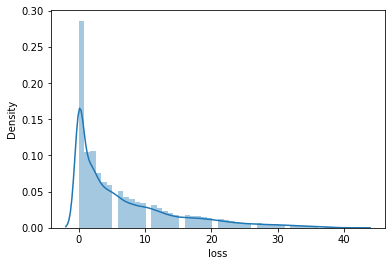

In [10]:
sns.distplot(train_df['loss'])

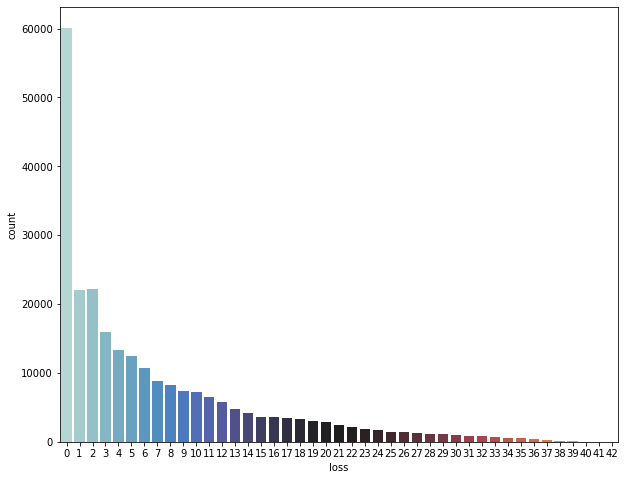

In [11]:
plt.figure(figsize = (10,8))
sns.countplot(data = train_df, x ='loss',palette='icefire');

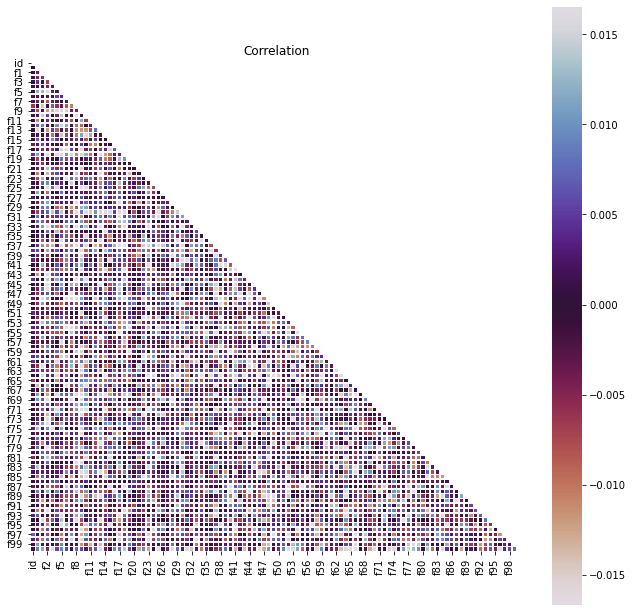

In [12]:
plt.figure(figsize=(11,11))
corr=train_df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, cmap='twilight_r', robust=True, center=0,square=True, linewidths=.6)
plt.title('Correlation')
plt.show()

In [13]:
# Finding correlations 
correlations_data = train_df.corr()['loss'].sort_values()
print(correlations_data.head(20),'\n')
print(correlations_data.tail(20),'\n')

f25   -0.030164
f52   -0.026566
f58   -0.023370
f66   -0.022424
f96   -0.020655
f3    -0.018853
f73   -0.014835
f63   -0.013990
f43   -0.013676
f41   -0.013031
f47   -0.012897
f69   -0.012869
f21   -0.012347
f88   -0.012331
f23   -0.012252
f34   -0.009829
f92   -0.009560
f82   -0.009339
f55   -0.008873
f11   -0.006714
Name: loss, dtype: float64 

f48     0.010663
f76     0.010930
f54     0.011414
f1      0.011847
f78     0.012899
f18     0.013782
f81     0.013784
f32     0.014113
f84     0.015250
f64     0.015482
f77     0.015697
f65     0.016285
f53     0.016576
f70     0.017387
f31     0.019942
f74     0.021610
f28     0.022780
f46     0.023828
f13     0.025730
loss    1.000000
Name: loss, dtype: float64 



In [14]:
train_df.drop(columns = 'id', inplace = True)
test_df.drop(columns = 'id', inplace = True)

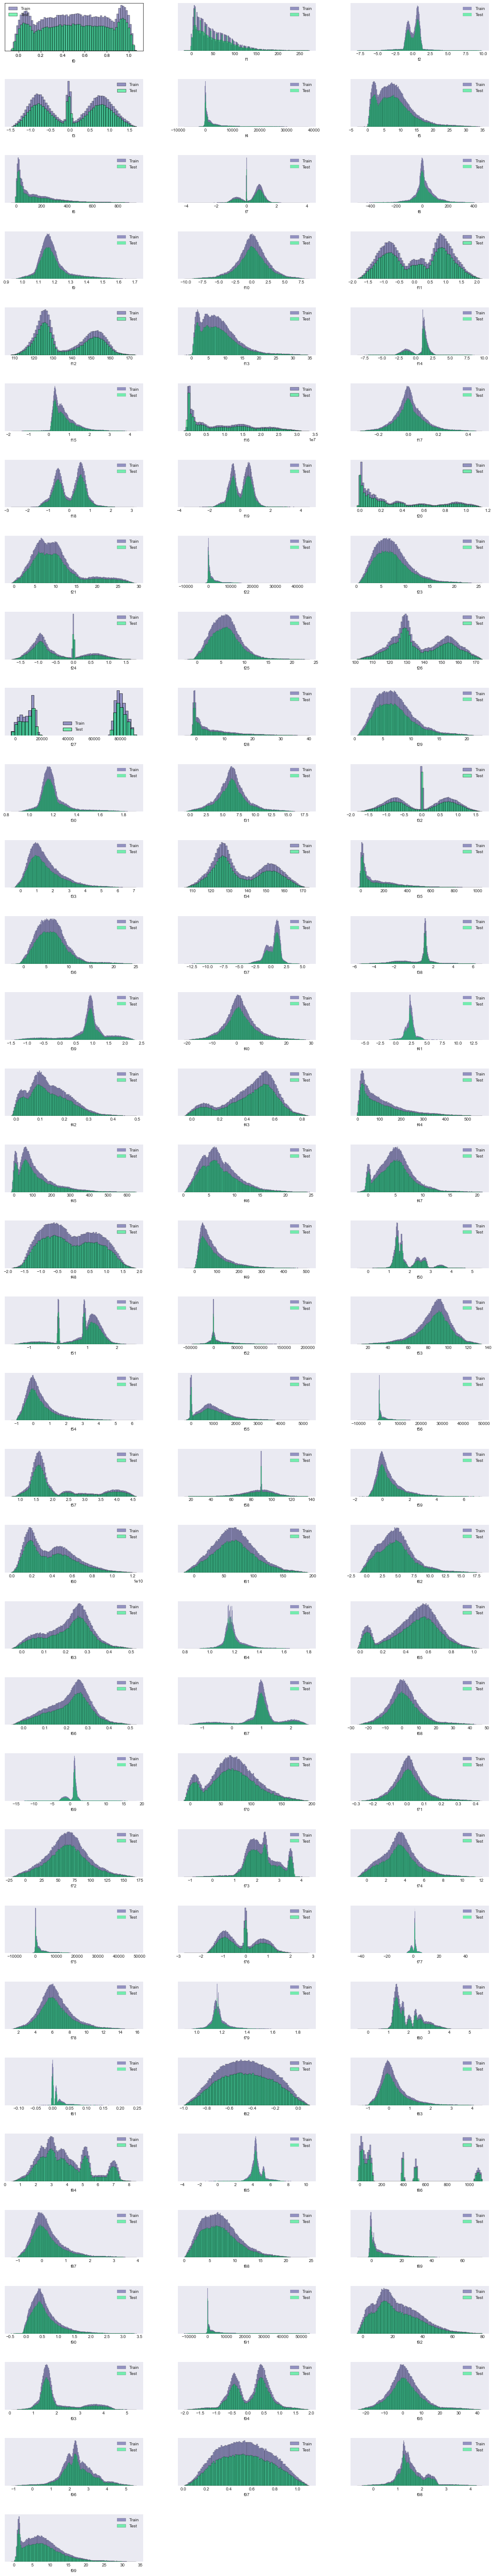

In [15]:
df = pd.concat([train_df.drop(["loss"], axis=1)])
df = train_df.columns[0:100]
plt.subplots(figsize=(20,160))
length = len(df)
for i, j in zip(df, range(length)):
    fig = plt.subplot((length/2), 3, j+1)
    plt.subplots_adjust(wspace=.25, hspace=.6)
    plt.style.use('seaborn-dark')
    plt.yticks([])
    sns.histplot(x=train_df[i], alpha=0.5,edgecolor="black",color='#3e3b92')
    sns.histplot(x=test_df[i], alpha=0.5,edgecolor="black",color='#00ee6e')
    fig.legend(labels=('Train','Test'))

In [16]:
# define dataset
X = train_df.drop('loss', axis=1)
y = train_df['loss']

In [17]:
from sklearn.model_selection import train_test_split

# creating dataset split for prediction
X_train, X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=42) # 80-20 split

# Checking split 
print('X_train:', X_train.shape)
print('y_train:', y_train.shape)
print('X_test:', X_test.shape)
print('y_test:', y_test.shape)


X_train: (200000, 100)
y_train: (200000,)
X_test: (50000, 100)
y_test: (50000,)


In [18]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(X_train)
X_train=sc.transform(X_train)
X_test=sc.transform(X_test)

In [19]:
#!pip install catboost

In [20]:
from catboost import CatBoostRegressor
model = CatBoostRegressor(random_state=42,iterations = 5000, learning_rate=0.005,early_stopping_rounds=50)
model.fit(X,y, verbose=0)

In [21]:
from sklearn import metrics
predicted = model.predict(X)

mae = metrics.mean_absolute_error(y, predicted)
mse = metrics.mean_squared_error(y, predicted)
rmse = np.sqrt(mse) 
r2 = metrics.r2_score(y,predicted)

print("mae:",mae)
print("mse:", mse)
print("rmse:", rmse)
print("r2:", r2)

mae: 6.050839117824877
mse: 60.341383668630755
rmse: 7.767971657300943
r2: 0.042901982735948696


In [24]:
y_pred1 = model.predict(test_df)

In [32]:
#!pip install shap

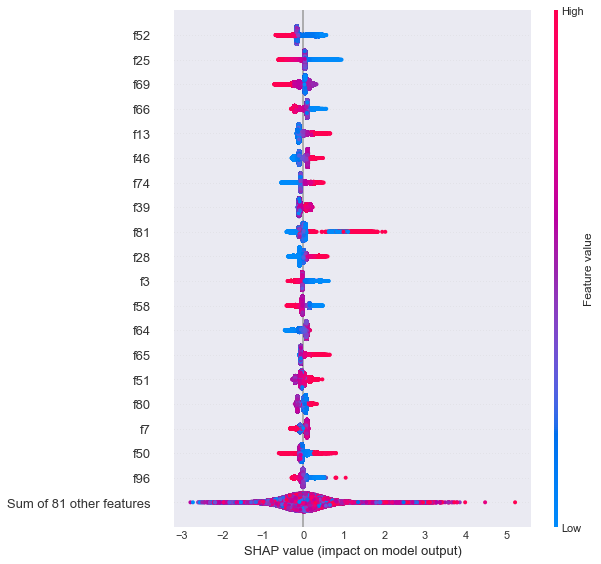

In [27]:
import shap
explainer = shap.Explainer(model)
shap_values = explainer(X)
shap.plots.beeswarm(shap_values,max_display=20)

In [36]:
df_subm['loss'] = y_pred1


In [37]:
df_subm

,id,loss
0,250000,7.587363
1,250001,4.892790
2,250002,7.582875
3,250003,7.236547
4,250004,7.619096
...,...,...
149995,399995,6.779333
149996,399996,6.871550
149997,399997,6.139360
149998,399998,5.602041


In [38]:
df_subm.to_csv('submission(1).csv', index=False)